# Exploratory Data Analysis (EDA)

This notebook generates plots for daily closing price of NIFTY 100 from 2017-01-02 to 2021-01-01 and minute-level closing rice of NIFTY 100 on 2021-01-01 for full market hours and first market hour. 

In [11]:
# import libraries and packages
import pandas as pd
import os
import matplotlib.pyplot as plt

In [12]:
from PIL import Image

## 1. Load data
- The first one hour of market hours (9:15 - 10:15)

In [13]:
raw_data = pd.read_csv('../data/raw data/raw_NIFTY100.csv')
raw_data['time'] = pd.to_datetime(raw_data.timestamp)

In [14]:
raw_data.head()

,timestamp,open,high,low,close,volume,time
0,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0,2017-01-02 09:15:00+05:30
1,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0,2017-01-02 09:16:00+05:30
2,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0,2017-01-02 09:17:00+05:30
3,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0,2017-01-02 09:18:00+05:30
4,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0,2017-01-02 09:19:00+05:30


In [15]:
raw_data['time']

0        2017-01-02 09:15:00+05:30
1        2017-01-02 09:16:00+05:30
2        2017-01-02 09:17:00+05:30
3        2017-01-02 09:18:00+05:30
4        2017-01-02 09:19:00+05:30
                    ...           
370735   2021-01-01 15:25:00+05:30
370736   2021-01-01 15:26:00+05:30
370737   2021-01-01 15:27:00+05:30
370738   2021-01-01 15:28:00+05:30
370739   2021-01-01 15:29:00+05:30
Name: time, Length: 370740, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [5]:
test_20210101 = raw_data.loc[raw_data.time.apply(lambda x:x.date()==raw_data.time[0].date())].set_index('time')
test_20210101.head()

,timestamp,open,high,low,close,volume
time,,,,,,
2017-01-02 09:15:00+05:30,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0
2017-01-02 09:16:00+05:30,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0
2017-01-02 09:17:00+05:30,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0
2017-01-02 09:18:00+05:30,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0
2017-01-02 09:19:00+05:30,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0


In [6]:
raw_data.time.min()

Timestamp('2017-01-02 09:15:00+0530', tz='pytz.FixedOffset(330)')

In [7]:
raw_data.time.max()

Timestamp('2021-01-01 15:29:00+0530', tz='pytz.FixedOffset(330)')

In [8]:
raw_data = raw_data.set_index('time')

C:\Users\sohyun\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


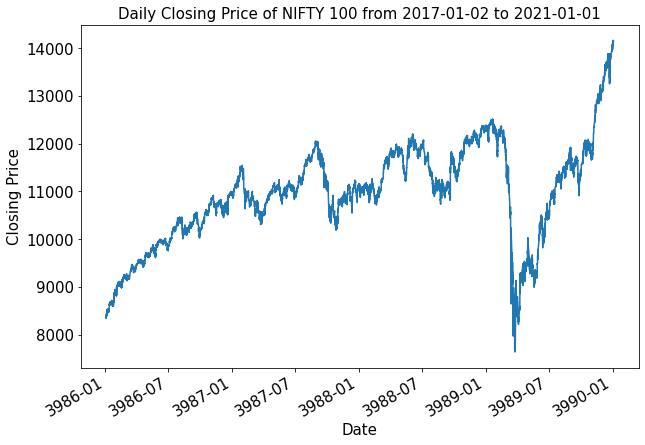

In [9]:
plt.figure(figsize=(10,7))
raw_data.close.plot(fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Daily Closing Price of NIFTY 100 from 2017-01-02 to 2021-01-01', fontsize = 15)
plt.show()

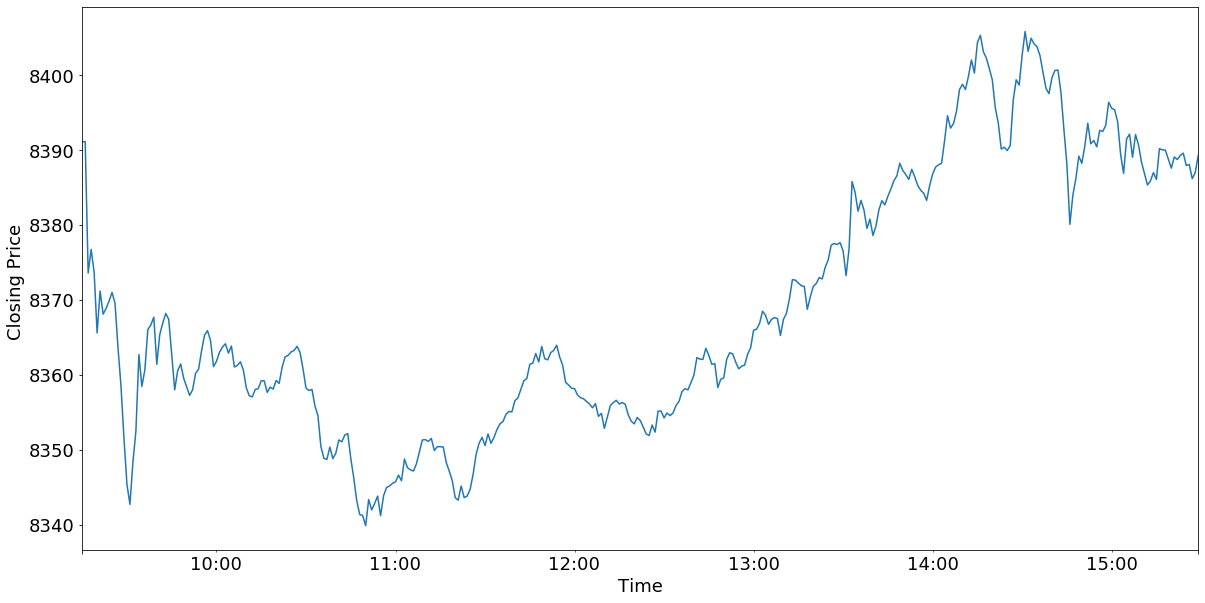

In [21]:
plt.figure(figsize=(10,7))
test_20210101.close.plot(fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Closing Price ',fontsize=15)
plt.show()

### All: Concat 8:30 - end

In [15]:
dm_fp = os.path.join(raw_fp, data_market_name)
data_market = pd.read_csv(dm_fp, parse_dates=['time'])

In [16]:
data_market.head()

,time,open,high,low,close,volume,diff,Volatility
0,2021-01-15 15:56:00-05:00,826.36,826.84,825.25,826.1118,138839,1.59,1.16642
1,2021-01-15 15:55:00-05:00,827.58,827.58,825.34,826.4188,138145,2.24,1.38642
2,2021-01-15 15:54:00-05:00,827.53,827.78,827.24,827.6000,88786,0.54,1.37042
3,2021-01-15 15:53:00-05:00,826.97,827.58,826.76,827.5000,127116,0.82,1.30198
4,2021-01-15 15:52:00-05:00,825.52,827.19,825.34,826.9800,95808,1.85,1.40800


In [17]:
data_market_vol_20210115 = data_market.loc[data_market.time.apply(lambda x:x.date()==data_market.time[0].date())].set_index('time')
data_market_vol_20210115.head()

,open,high,low,close,volume,diff,Volatility
time,,,,,,,
2021-01-15 15:56:00-05:00,826.36,826.84,825.25,826.1118,138839,1.59,1.16642
2021-01-15 15:55:00-05:00,827.58,827.58,825.34,826.4188,138145,2.24,1.38642
2021-01-15 15:54:00-05:00,827.53,827.78,827.24,827.6000,88786,0.54,1.37042
2021-01-15 15:53:00-05:00,826.97,827.58,826.76,827.5000,127116,0.82,1.30198
2021-01-15 15:52:00-05:00,825.52,827.19,825.34,826.9800,95808,1.85,1.40800


In [20]:
data_all = pd.concat([data_vol_20210115, data_market_vol_20210115])
data_all.head()

,open,high,low,close,volume,diff,Volatility
time,,,,,,,
2021-01-15 09:26:00-05:00,852.98,853.25,852.98,853.25,3460,0.27,1.20796
2021-01-15 09:25:00-05:00,852.75,853.00,852.75,852.85,4066,0.25,0.52396
2021-01-15 09:24:00-05:00,853.20,853.20,852.50,852.80,5050,0.70,0.36396
2021-01-15 09:23:00-05:00,853.43,853.45,853.25,853.25,3859,0.20,0.31396
2021-01-15 09:22:00-05:00,853.50,853.50,853.50,853.50,1805,0.00,0.28400


In [22]:
# data_all.to_csv('test_all_vol_20210115.csv')

In [118]:
data_all.reset_index().time.min()

Timestamp('2021-01-15 08:30:00-0500', tz='tzoffset(None, -18000)')

In [119]:
data_all.reset_index().time.max()

Timestamp('2021-01-15 15:56:00-0500', tz='tzoffset(None, -18000)')

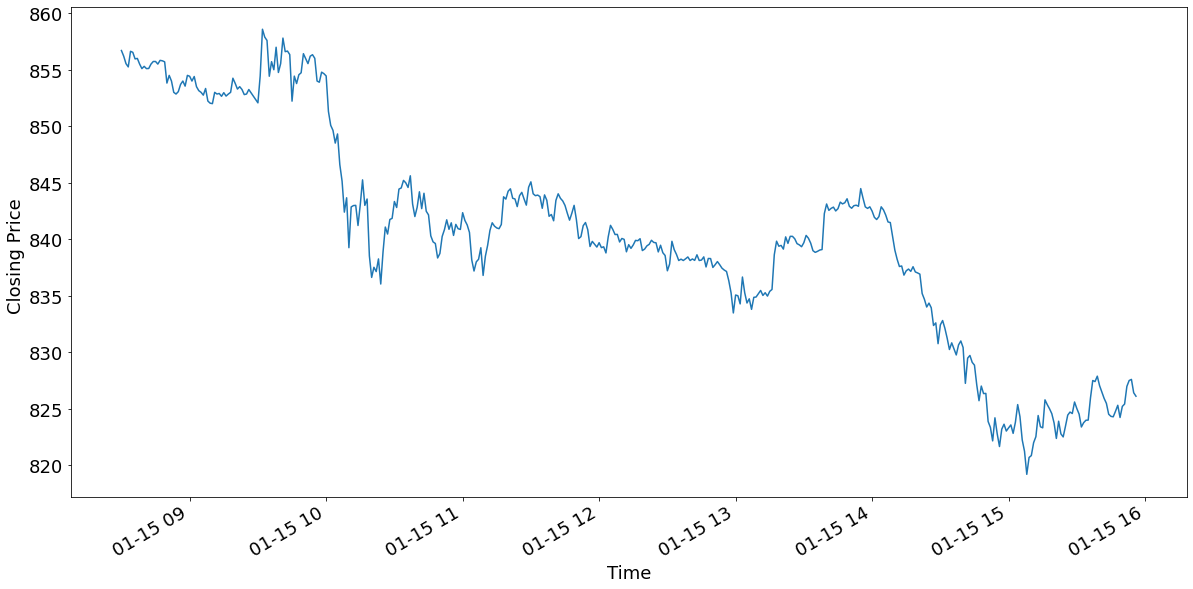

In [120]:
plt.figure(figsize=(10,7))
data_all.close.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price ',fontsize=18)
plt.show()

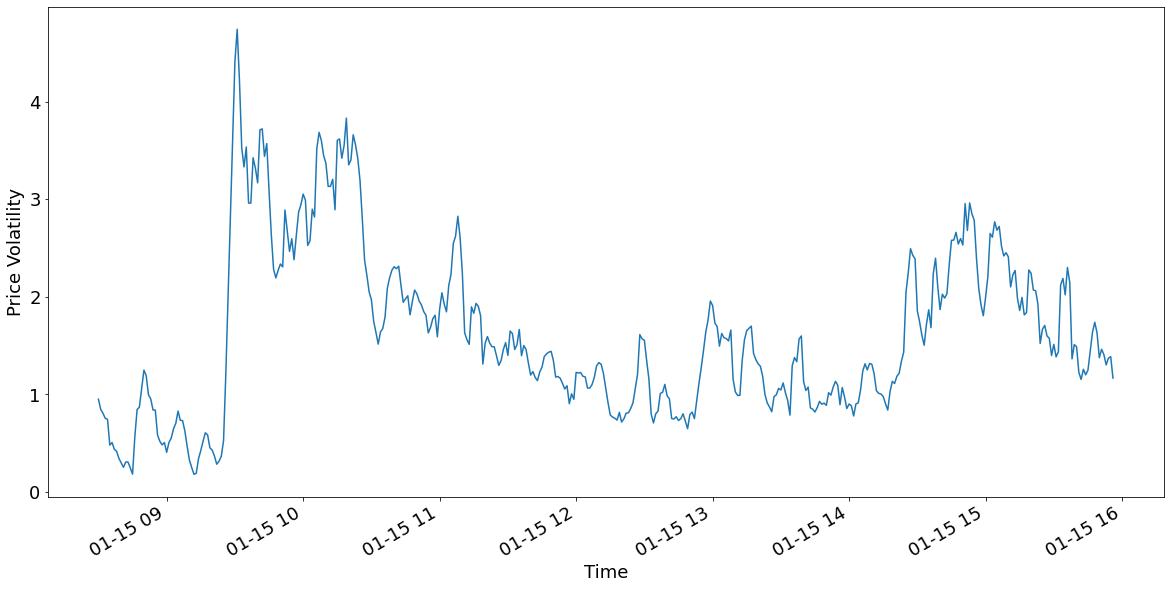

In [121]:
plt.figure(figsize=(10,7))
data_all.Volatility.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price Volatility',fontsize=18)
plt.show()

## Image Data

In [130]:
img_folder = '../data/imgs'

In [122]:
gdf_ref_fn = 'gramian_date_img_reference.csv'
gdf_ref = pd.read_csv(os.path.join(raw_fp, gdf_ref_fn))

In [128]:
img_idx_20200115 = gdf_ref[gdf_ref.date=='2020-01-15'].index[0]
img_idx_20200115

242

In [157]:
gramian_df = pd.read_csv(os.path.join(raw_fp, '../data/gramian_df.csv'))

In [158]:
gramian_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0646,0.0646,0.0802,0.079600,0.055600,0.026000,0.026000,0.006400,0.001200,0.005200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0328,0.0528,0.0648,0.087600,0.106800,0.110800,0.110804,0.100404,0.097604,0.102004,...,0.0204,0.024,0.0214,0.0374,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1064,0.0792,0.0336,0.026000,0.032000,0.032000,0.032000,0.032000,0.012000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0004,0.0020,0.0080,0.010000,0.022000,0.028800,0.029200,0.026000,0.039600,0.043600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0160,0.0160,0.0360,0.033808,0.033808,0.020208,0.020208,0.000208,0.000000,0.000800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
gdf_df_20200115 = gramian_df.iloc[img_idx_20200115]

In [154]:
temp = gdf_df_20200115[:-1]

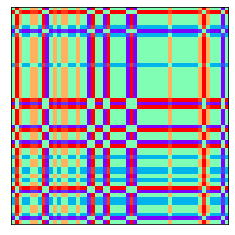

In [146]:
im = Image.open(img_folder+'/'+'2021-01-15.png')#.shape
im

In [148]:
im.size

(235, 235)

In [156]:
from sklearn.preprocessing import MinMaxScaler
from pyts.image import GramianAngularField

In [160]:
scaler = MinMaxScaler(feature_range=(-1,1))
# did not flatten the images
gadf = GramianAngularField(sample_range=(-1,1), method='difference')
curr_row = gramian_df.iloc[img_idx_20200115].dropna().to_frame().T
# Scale the data to be between -1 and 1
curr_feat = scaler.fit_transform(curr_row)
# gramian
curr_X_gadf = gadf.fit_transform(curr_feat)

In [165]:
pd.DataFrame(curr_X_gadf[:,:,1])

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,-2.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,...,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0


In [166]:
curr_X_gadf

array([[[ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [-2., -2.,  0., ..., -2., -2., -2.],
        ...,
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.]]])